In [1]:
import os

base_dir = "deepfashion"
image_dir = os.path.join(base_dir, "images")
mask_dir = os.path.join(base_dir, "masks")

print("images/:", len(os.listdir(image_dir)), "files")
print("masks/:", len(os.listdir(mask_dir)), "files")

image_dir = "deepfashion/images"
image_files = sorted(os.listdir(image_dir))

images/: 13752 files
masks/: 13752 files


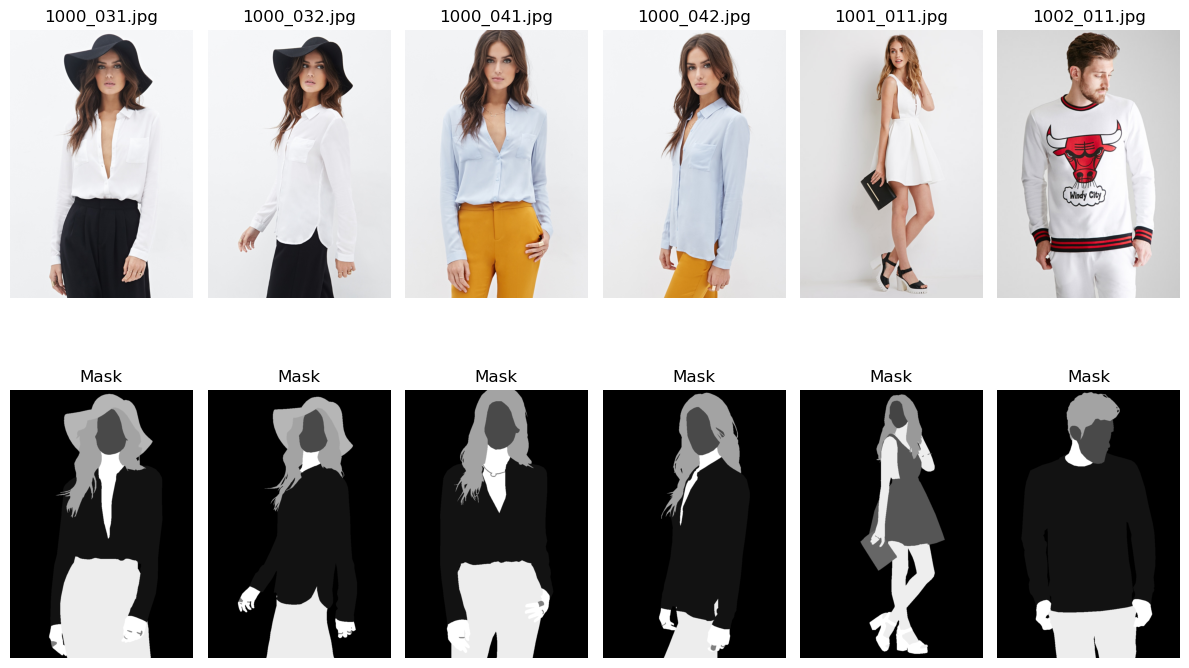

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

sample_files = image_files[:6]

plt.figure(figsize=(12, 8))
for i, fname in enumerate(sample_files):
    img = mpimg.imread(os.path.join(image_dir, fname))
    mask_name = fname.replace(".jpg", ".png")
    mask = mpimg.imread(os.path.join(mask_dir, mask_name))

    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')

    plt.subplot(2, 6, i+7)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()

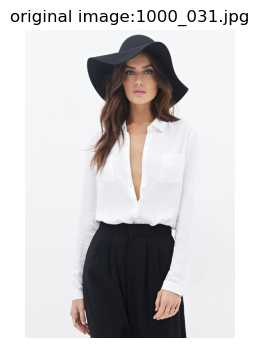

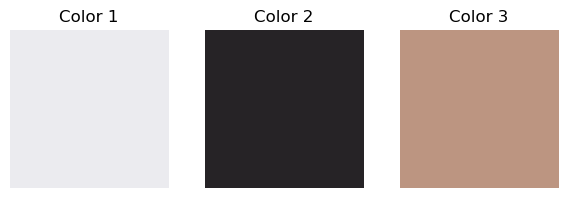

In [3]:
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# 圖片與遮罩路徑
sample_file = image_files[0]
img_path = os.path.join(image_dir, sample_file)
mask_path = os.path.join("deepfashion/masks", sample_file.replace(".jpg", ".png"))

# 顯示原圖
img_rgb = mpimg.imread(img_path)
plt.figure(figsize=(6, 4))
plt.imshow(img_rgb)
plt.title(f"original image:{sample_file}")
plt.axis('off')
plt.show()

# 讀取遮罩（灰階）
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask = mask > 0  # 將遮罩轉為布林陣列（True 表示服裝區域）

# 讀取原圖並轉 RGB
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 過濾背景，只保留服裝區域像素
masked_pixels = img[mask]

# 提取主色（只用服裝區域）
kmeans = KMeans(n_clusters=3).fit(masked_pixels)
colors = kmeans.cluster_centers_.astype(int)

# 顯示主色
plt.figure(figsize=(6, 2))
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    plt.imshow([[color / 255]])
    plt.title(f"Color {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

mask_path = os.path.join(mask_dir, sample_files[0].replace(".jpg", ".png"))
mask = mpimg.imread(mask_path)
if mask.ndim == 3:
    mask = mask[:, :, 0]

coverage = np.mean(mask > 0)
print(f"遮罩覆蓋率：{coverage:.2%}")

遮罩覆蓋率：47.93%


In [6]:
from collections import Counter
import matplotlib.pyplot as plt
import os

image_dir = "deepfashion/images"
image_files = sorted(os.listdir(image_dir))

product_ids = [f[:4] for f in image_files]
product_counts = Counter(product_ids)

In [7]:
unique_products = set(product_ids)
print("商品總數：", len(unique_products))

商品總數： 4600


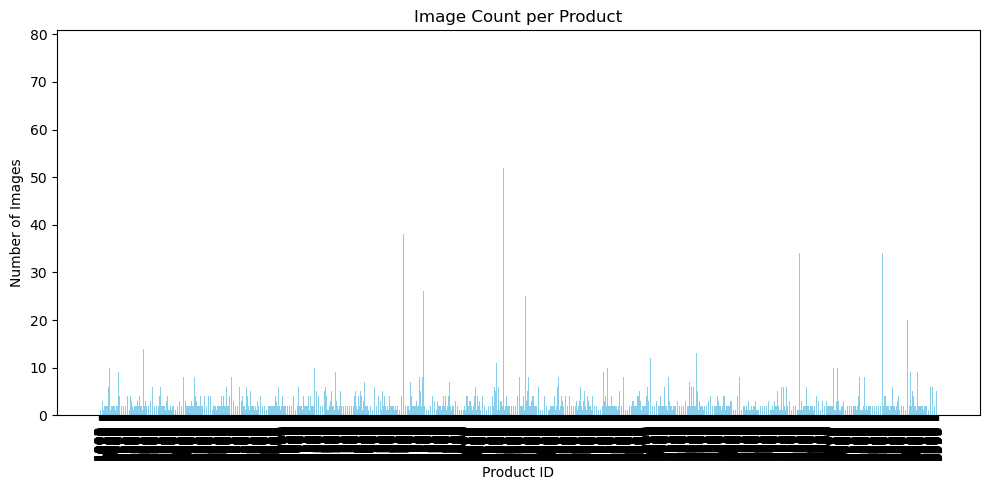

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(product_counts.keys(), product_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Image Count per Product")
plt.xlabel("Product ID")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

圖片數量最多的前五個產品：
產品 1903：77 張
產品 2661：59 張
產品 2671：58 張
產品 1877：56 張
產品 3217：52 張
普遍的圖片數量是 2 張，共有 2270 個產品


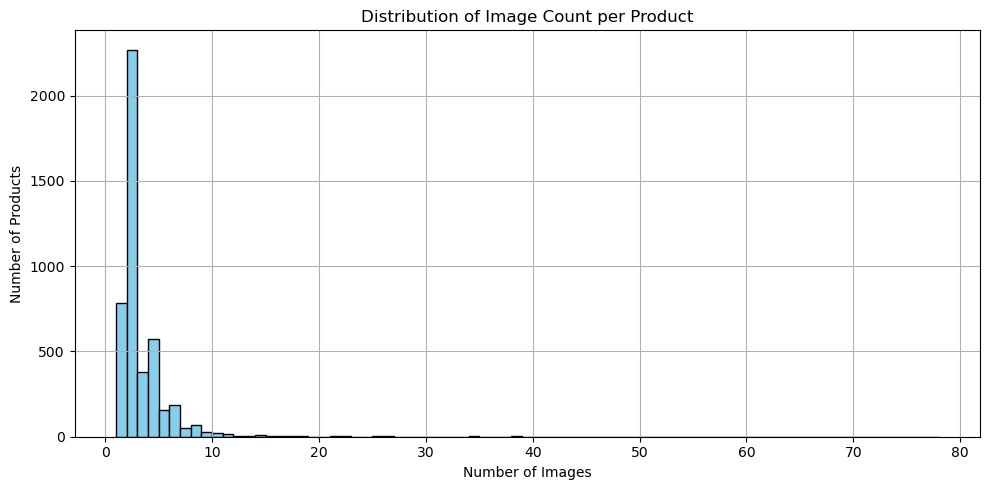

In [19]:
from collections import Counter
import matplotlib.pyplot as plt
import os

image_dir = "deepfashion/images"
image_files = sorted(os.listdir(image_dir))

product_ids = [f[:4] for f in image_files]
product_counts = Counter(product_ids)

# 中文列出前五名
print("圖片數量最多的前五個產品：")
for pid, count in product_counts.most_common(5):
    print(f"產品 {pid}：{count} 張")

# 統計最常見的圖片數量
count_freq = Counter(product_counts.values())
most_common_count, freq = count_freq.most_common(1)[0]
print(f"普遍的圖片數量是 {most_common_count} 張，共有 {freq} 個產品")

# 分佈圖
plt.figure(figsize=(10, 5))
plt.hist(product_counts.values(), bins=range(1, max(product_counts.values())+2), edgecolor='black', color='skyblue')
plt.title("Distribution of Image Count per Product")
plt.xlabel("Number of Images")
plt.ylabel("Number of Products")
plt.grid(True)
plt.tight_layout()
plt.show()

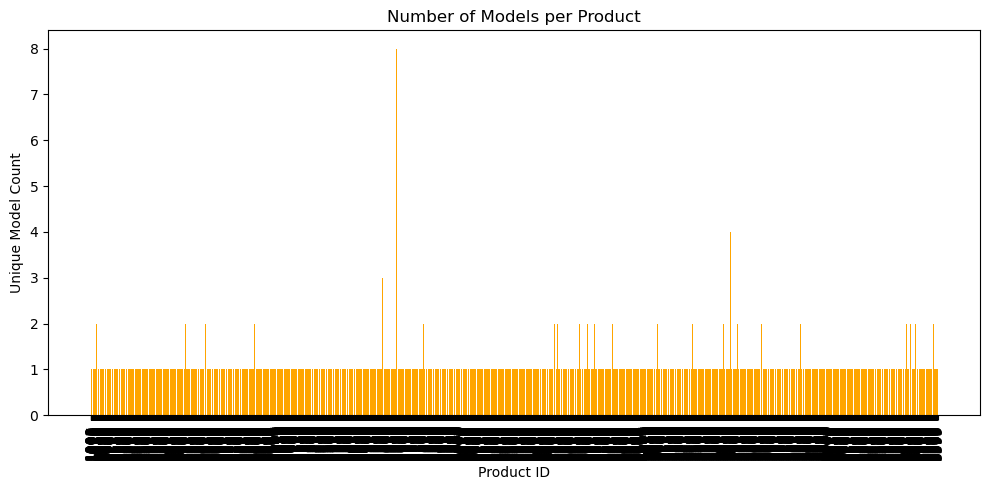

In [10]:
from collections import defaultdict

product_model_map = defaultdict(set)

for fname in image_files:
    pid = fname[:4]
    model = fname[5]
    product_model_map[pid].add(model)

model_counts = {pid: len(models) for pid, models in product_model_map.items()}

plt.figure(figsize=(10, 5))
plt.bar(model_counts.keys(), model_counts.values(), color='orange')
plt.xticks(rotation=90)
plt.title("Number of Models per Product")
plt.xlabel("Product ID")
plt.ylabel("Unique Model Count")
plt.tight_layout()
plt.show()

模特兒最多的前五個產品：
產品 1981：8 位模特兒
產品 2661：8 位模特兒
產品 1877：7 位模特兒
產品 1903：7 位模特兒
產品 2671：7 位模特兒
普遍的模特兒數量是 1 位，共有 4475 個產品


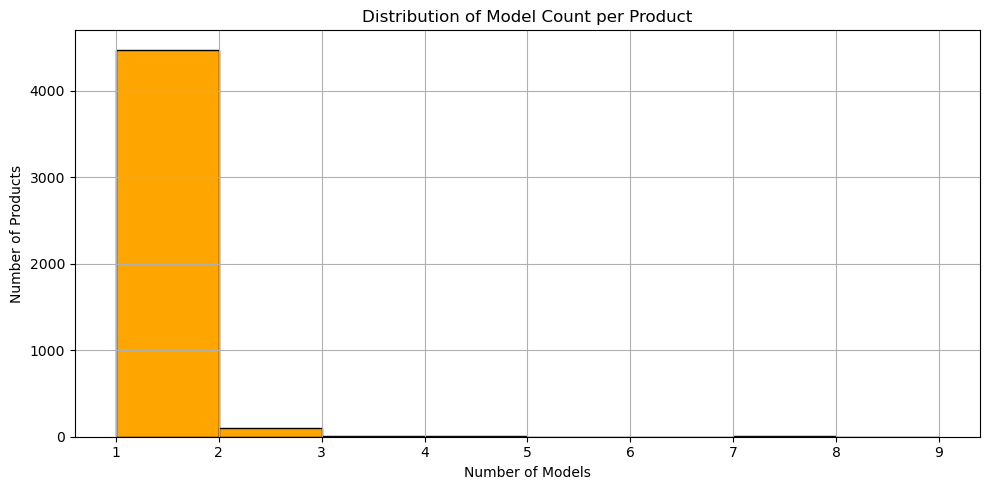

In [20]:
from collections import defaultdict

product_model_map = defaultdict(set)

for fname in image_files:
    pid = fname[:4]
    model = fname[5]
    product_model_map[pid].add(model)

model_counts = {pid: len(models) for pid, models in product_model_map.items()}

# 中文列出前五名
print("模特兒最多的前五個產品：")
for pid, count in sorted(model_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"產品 {pid}：{count} 位模特兒")

# 統計最常見的模特兒數量
model_freq = Counter(model_counts.values())
most_common_model, freq = model_freq.most_common(1)[0]
print(f"普遍的模特兒數量是 {most_common_model} 位，共有 {freq} 個產品")

# 分佈圖
plt.figure(figsize=(10, 5))
plt.hist(model_counts.values(), bins=range(1, max(model_counts.values())+2), edgecolor='black', color='orange')
plt.title("Distribution of Model Count per Product")
plt.xlabel("Number of Models")
plt.ylabel("Number of Products")
plt.grid(True)
plt.tight_layout()
plt.show()

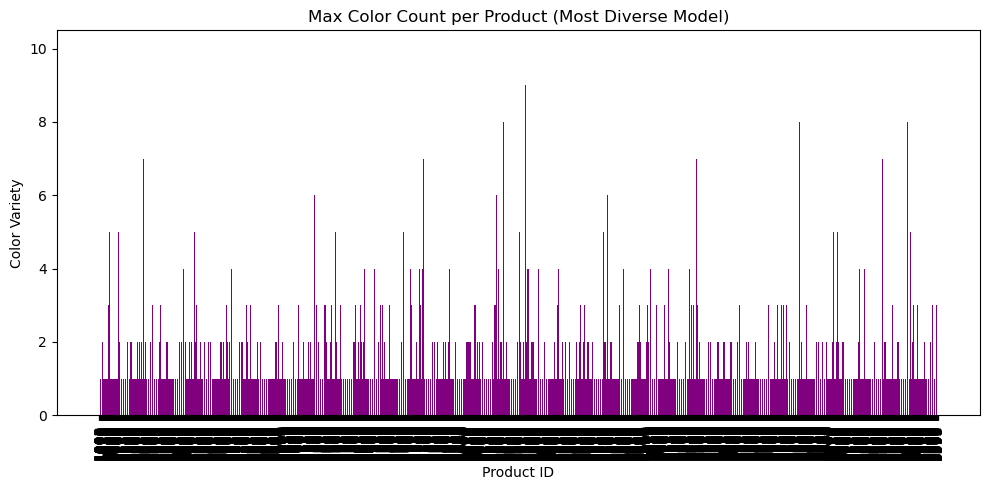

In [12]:
product_model_color_map = defaultdict(lambda: defaultdict(set))

for fname in image_files:
    pid = fname[:4]
    model = fname[5]
    color = fname[6]
    product_model_color_map[pid][model].add(color)

product_max_color_counts = {}
for pid, model_colors in product_model_color_map.items():
    max_color_count = max(len(colors) for colors in model_colors.values())
    product_max_color_counts[pid] = max_color_count

plt.figure(figsize=(10, 5))
plt.bar(product_max_color_counts.keys(), product_max_color_counts.values(), color='purple')
plt.xticks(rotation=90)
plt.title("Max Color Count per Product (Most Diverse Model)")
plt.xlabel("Product ID")
plt.ylabel("Color Variety")
plt.tight_layout()
plt.show()

顏色最多的前五個產品（以最多模特兒為準）：
產品 5113：10 種顏色
產品 5239：10 種顏色
產品 2441：9 種顏色
產品 2661：9 種顏色
產品 2734：9 種顏色
普遍的顏色數量是 1 種，共有 2978 個產品


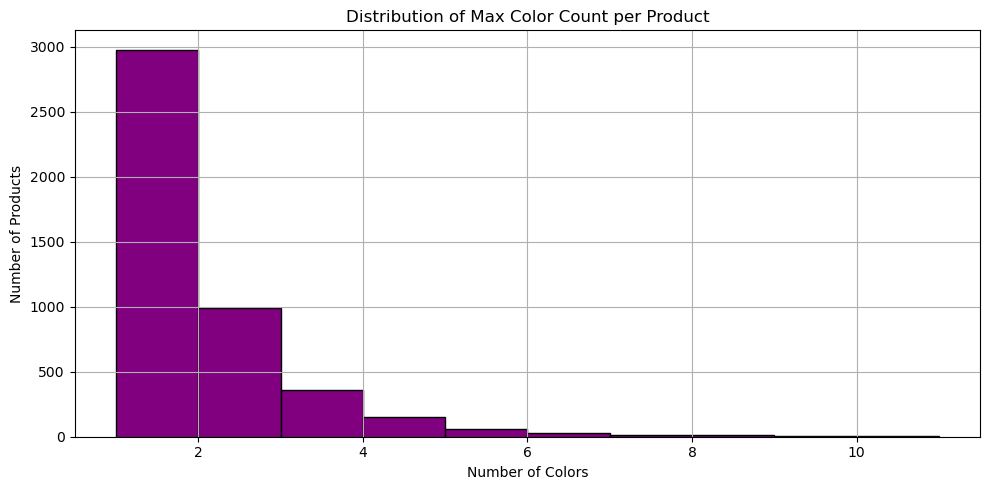

In [21]:
product_model_color_map = defaultdict(lambda: defaultdict(set))

for fname in image_files:
    pid = fname[:4]
    model = fname[5]
    color = fname[6]
    product_model_color_map[pid][model].add(color)

product_max_color_counts = {}
for pid, model_colors in product_model_color_map.items():
    max_color_count = max(len(colors) for colors in model_colors.values())
    product_max_color_counts[pid] = max_color_count

# 中文列出前五名
print("顏色最多的前五個產品（以最多模特兒為準）：")
for pid, count in sorted(product_max_color_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"產品 {pid}：{count} 種顏色")

# 統計最常見的顏色數量
color_freq = Counter(product_max_color_counts.values())
most_common_color, freq = color_freq.most_common(1)[0]
print(f"普遍的顏色數量是 {most_common_color} 種，共有 {freq} 個產品")

# 分佈圖
plt.figure(figsize=(10, 5))
plt.hist(product_max_color_counts.values(), bins=range(1, max(product_max_color_counts.values())+2), edgecolor='black', color='purple')
plt.title("Distribution of Max Color Count per Product")
plt.xlabel("Number of Colors")
plt.ylabel("Number of Products")
plt.grid(True)
plt.tight_layout()
plt.show()